# Pump it Up: EDA
competition website:  https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/<br>
data downloads:  https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data files
train = pd.read_csv('DataSets/Training_set_values.csv', index_col='id')
labels = pd.read_csv('DataSets/Training_set_labels.csv', index_col='id').status_group
test = pd.read_csv('DataSets/Test_set_values.csv', index_col='id')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


***
## View the data at a glance

In [2]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Let's check all of the columns for the first observation

In [3]:
train.iloc[0,:]

amount_tsh                                  6000
date_recorded                         2011-03-14
funder                                     Roman
gps_height                                  1390
installer                                  Roman
longitude                                34.9381
latitude                                -9.85632
wpt_name                                    none
num_private                                    0
basin                                 Lake Nyasa
subvillage                              Mnyusi B
region                                    Iringa
region_code                                   11
district_code                                  5
lga                                       Ludewa
ward                                    Mundindi
population                                   109
public_meeting                              True
recorded_by              GeoData Consultants Ltd
scheme_management                            VWC
scheme_name         

The date_recorded column must be converted to a useable format. I'll convert it to seconds from an arbitrary date. <br>
Some of these text entries are clearly categorical, while others are will have many unique values. Also, some of the integer columns should be categrical features such as "region" and "region_code".
***
## View the target data

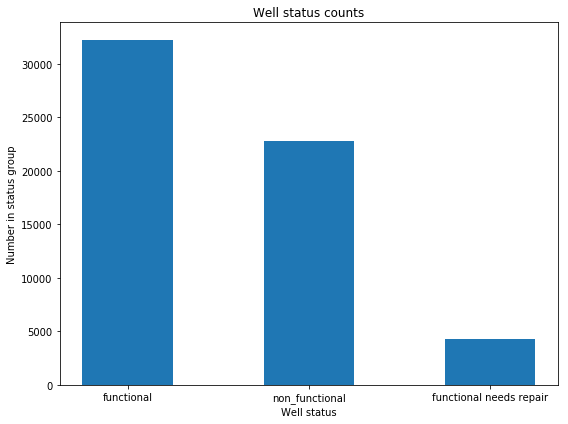

In [4]:
target_value_count = labels.value_counts()

# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8

plt.bar(index, target_value_count, bar_width)

 
plt.xlabel('Well status')
plt.ylabel('Number in status group')
plt.title('Well status counts')
plt.xticks(index, ('functional', 'non_functional', 'functional needs repair'))
 
plt.tight_layout()
plt.show()

The classes are imbalanced. This should be addressed with class weights.

***
## Types of data by column count

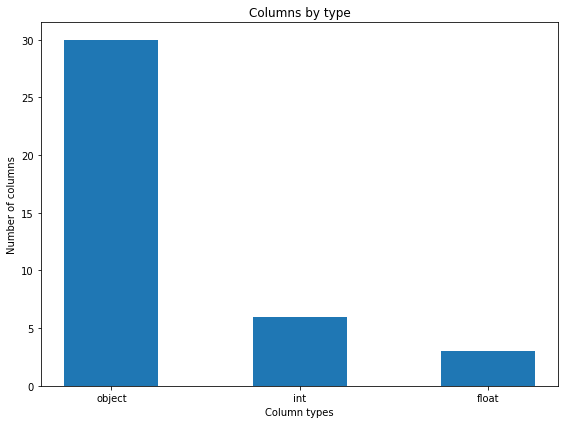

In [5]:
train_column_types = train.dtypes.value_counts()

# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8

plt.bar(index, train_column_types, bar_width)

 
plt.xlabel('Column types')
plt.ylabel('Number of columns')
plt.title('Columns by type')
plt.xticks(index, ('object', 'int', 'float'))
 
plt.tight_layout()
plt.show()

***
## Number of columns with null values

In [6]:
def count_null_columns(dataframe):
    dtypes = ['object', 'int64', 'float64']
    count = [0,0,0]
    
    for column in dataframe.columns:
        dtype = dataframe[column].dtype
        null_present = dataframe[column].isnull().values.any()
        
        if null_present & (dtype == 'object'):
            count[0] = count[0] + 1
        if null_present & (dtype == 'int64'):
            count[1] = count[1] + 1
        if null_present & (dtype == 'float64'):
            count[2] = count[2] + 1
    
    return count

# Count null columns
train_count_null_columns = count_null_columns(train)
test_count_null_columns = count_null_columns(test)

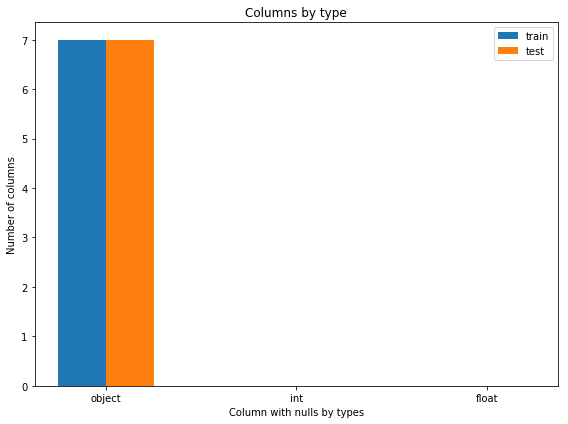

In [7]:
# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
plt.bar(index, train_count_null_columns, bar_width, label='train')
plt.bar(index + bar_width, test_count_null_columns, bar_width, label='test')

plt.xlabel('Column with nulls by types')
plt.ylabel('Number of columns')
plt.title('Columns by type')
plt.xticks(index + .5*bar_width, ('object', 'int', 'float'))
plt.legend()
 
plt.tight_layout()
plt.show()

### Number of nulls each of the 7 object columns

In [8]:
null_columns = list(train.loc[:,train.isnull().any()].columns)

In [9]:
def null_count(dataframe):
    null_count_list = []
    for column in null_columns:
        count = dataframe[column].isnull().values.sum()
        null_count_list.append(count)
    
    return null_count_list

train_nulls = null_count(train)
test_nulls = null_count(test)

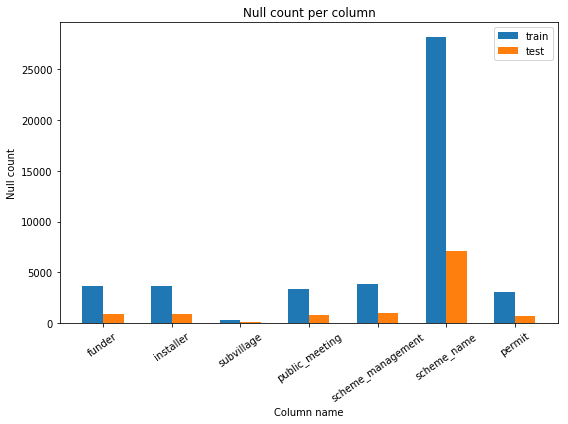

In [10]:
# create plot
n_groups = len(null_columns)
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, train_nulls, bar_width, label='train')
rects2 = plt.bar(index + bar_width, test_nulls, bar_width, label='test')

plt.xlabel('Column name')
plt.ylabel('Null count')
plt.title('Null count per column')
plt.xticks(rotation=35)
plt.xticks(index + .5*bar_width, null_columns)
plt.legend()
 
plt.tight_layout()
plt.show()

***
## Check for outliers

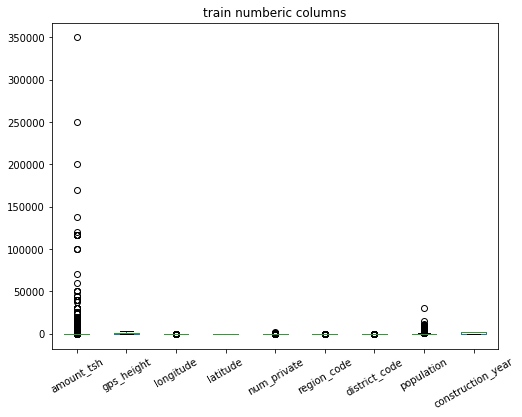

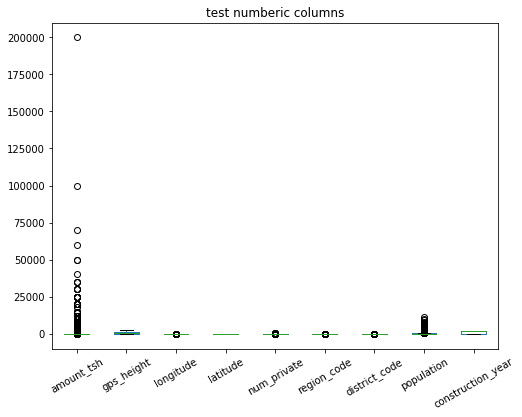

In [11]:
# Isolate the numeric data
train_num = train.select_dtypes(exclude=['object'])
test_num = test.select_dtypes(exclude=['object'])

# Create a box plot to look for outliers
train_num.plot.box(figsize=(8,6), title='train numberic columns',rot=30)
plt.show()
test_num.plot.box(figsize=(8,6), title='test numberic columns',rot=30)
plt.show()

# Let's remove 'amount_tsh' and 'population' and check again

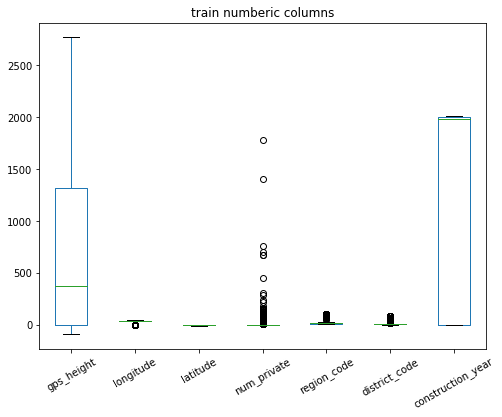

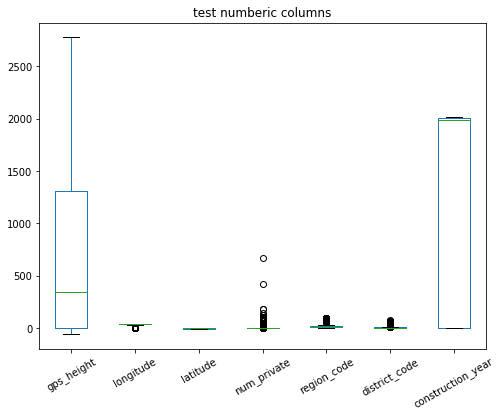

In [12]:
# Isolate the numeric data
train_num = train.select_dtypes(exclude=['object']).drop(['amount_tsh','population'], axis='columns')
test_num = test.select_dtypes(exclude=['object']).drop(['amount_tsh','population'], axis='columns')

# Create a box plot to look for outliers
train_num.plot.box(figsize=(8,6), title='train numberic columns',rot=30)
plt.show()
test_num.plot.box(figsize=(8,6), title='test numberic columns',rot=30)
plt.show()

### View longitude and latitude as a scatter plot map

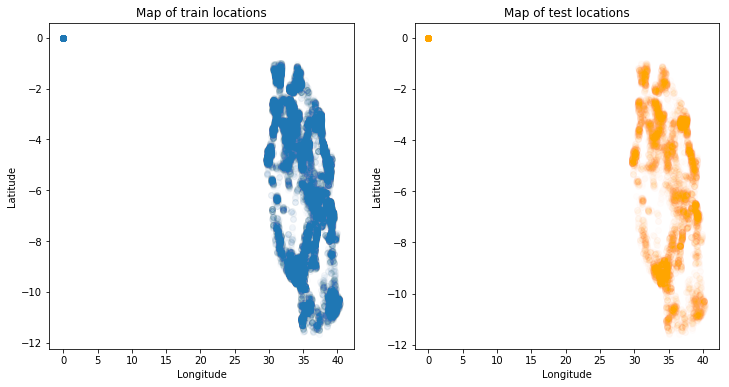

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(train.longitude, train.latitude, alpha=.01, label='train')
plt.title('Map of train locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.subplot(1, 2, 2)
plt.scatter(test.longitude, test.latitude, alpha=.01, c='orange', label='test')
plt.title('Map of test locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**There are clearly outliers in the locations.** The point having a latitude and longitude of 0 are located in the Atlantic ocean. This is clearly false. The question then is how to impute these positions: mean, median...?<p>
Let's remove these point and look at the map again.

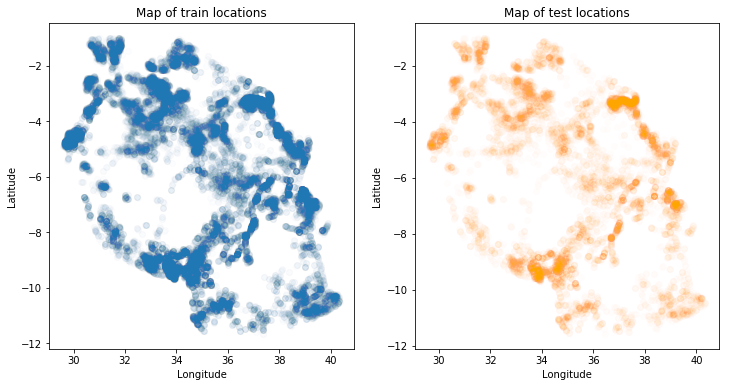

In [14]:
train_no_atlanic = train.loc[train.longitude != 0, :]
test_no_atlanic = test.loc[test.longitude != 0, :]

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(train_no_atlanic.longitude, train_no_atlanic.latitude, alpha=.01)
plt.title('Map of train locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.subplot(1, 2, 2)
plt.scatter(test_no_atlanic.longitude, test_no_atlanic.latitude, alpha=.01, c='orange')
plt.title('Map of test locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Check the number of unique values in the object columns

In [19]:
train_obj = train.select_dtypes(include='object').drop('date_recorded', axis='columns')
test_obj = test.select_dtypes(include='object').drop('date_recorded', axis='columns')

In [24]:
pd.concat([train_obj.nunique(),test_obj.nunique()], axis='columns').rename({0:'train',1:'test'}, axis='columns')

,train,test
funder,1897,980
installer,2145,1091
wpt_name,37400,10840
basin,9,9
subvillage,19287,8443
region,21,21
lga,125,125
ward,2092,1959
public_meeting,2,2
recorded_by,1,1


There are at least 6 columns that have a very large count of unique values: funder, installer, wpt_name, subvillage, ward, scheme_name. We could use the bag-of-words technique on this, or simply not use this data. Perhaps we should try both methods. The columns "lga" but there are equal number of unique counts. Let's check to see if they completely overlap

In [30]:
train_lga = set(train.lga)
test_lga = set(test.lga)
print("train.lga and test.lga have the same unique values:", test_lga == test_lga)

train.lga and test.lga have the same unique values: True


***
# Summary of the data processing to be done
- "date_recorded" must be converted to a useable format. I will convert it to seconds from an arbitrary date.
- "region" and "region_code" must to be converted to strings, and then will be encoded with all the other objects.
- The null values in the object columns must be imputed. I will fill them with "no_entry", and thus preserving that there was missing data.
- The longitude and latitude outliers must be address with a median or mean fill.
- Categrical text should be separated from non-categorical text as it will be treated differently